In [11]:
import os, json
import numpy as np
import models
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from engine import train, validate, test
from dataset import ClevrPOCDataSet
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel

import pickle


In [2]:
DATA_FOLDER_NAME = 'output-2000'
DATA_FOLDER = '/home/marjan/code/CLEVR-POC/clevr-poc-dataset-gen/' + DATA_FOLDER_NAME + '/incomplete'
ENVIRONMENT_FOLDER = '/home/marjan/code/CLEVR-POC/clevr-poc-dataset-gen/environment_constraints'

In [3]:

with open(os.path.join('/home/marjan/code/CLEVR-POC/clevr-poc-dataset-gen', 'data', 'properties.json'), encoding="utf-8") as f:
    properties = json.load(f)


key_properties_values = []
for key_property in properties:
    if key_property == 'regions':
        continue
    key_properties_values.extend(properties[key_property].keys())

total_labels_to_index = {k: v for v, k in enumerate(key_properties_values)}
total_labels_to_index


{'cube': 0,
 'sphere': 1,
 'cylinder': 2,
 'cone': 3,
 'red': 4,
 'blue': 5,
 'green': 6,
 'yellow': 7,
 'rubber': 8,
 'metal': 9,
 'large': 10,
 'small': 11}

In [4]:

matplotlib.style.use('ggplot')
# initialize the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_preprocess = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
#clip_model_path = "openai/clip-vit-base-patch32"
#clip_model, clip_preprocess = clip.load('ViT-B/32', device)


In [5]:
#intialize the model

clip_embedding_dim = 512
env_embedding_dim = 768
clip_model, final_classifier = models.model(requires_grad=False, 
                                      clip_model = clip_model,
                                      #checkpoint=clip_model_path,
                                      clip_embedding_dim=clip_embedding_dim,
                                      env_embedding_dim = env_embedding_dim,
                                      output_dim=len(total_labels_to_index))

clip_model.to(device)
final_classifier.to(device)

dropout = nn.Dropout(0.1) # ????

# learning parameters
lr = 0.001
epochs = 200
batch_size = 8
optimizer = optim.Adam(final_classifier.parameters(), lr=lr)
criterion = nn.BCELoss()
dropout = nn.Dropout(0.1)



In [6]:
# train dataset
train_data = ClevrPOCDataSet(DATA_FOLDER, 'training', total_labels_to_index, ENVIRONMENT_FOLDER)

# validation dataset
valid_data = ClevrPOCDataSet(DATA_FOLDER, 'validation', total_labels_to_index, ENVIRONMENT_FOLDER)

# train data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# validation data loader
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)

print('a')

a


In [7]:
# start the training and validation
train_loss = []
valid_loss = []
best_validation_loss = 100000
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(final_classifier, clip_model, train_loader, optimizer, criterion, train_data, device, dropout, clip_preprocess)
    valid_epoch_loss = validate(final_classifier, clip_model, valid_loader, criterion, valid_data, device, dropout, clip_preprocess)
    if best_validation_loss > valid_epoch_loss:
        best_validation_loss = valid_epoch_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': final_classifier.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, 'outputs/best_model_' + DATA_FOLDER_NAME + '.pth')

    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    
    with open('outputs/train_loss_' + DATA_FOLDER_NAME + '.pickle', 'wb') as f:
        pickle.dump(train_loss, f)
    with open('outputs/train_loss_' + DATA_FOLDER_NAME + '.pickle', 'wb') as f:
        pickle.dump(valid_loss, f)        
     
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.5281
Val Loss: 0.4388
Epoch 2 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.42it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.43it/s]


Train Loss: 0.4349
Val Loss: 0.4268
Epoch 3 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.4300
Val Loss: 0.4279
Epoch 4 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.41it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.4270
Val Loss: 0.4192
Epoch 5 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.41it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.43it/s]


Train Loss: 0.4224
Val Loss: 0.4167
Epoch 6 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.41it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.4180
Val Loss: 0.4158
Epoch 7 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.4148
Val Loss: 0.4132
Epoch 8 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.4117
Val Loss: 0.4091
Epoch 9 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.38it/s]


Train Loss: 0.4084
Val Loss: 0.4079
Epoch 10 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.4059
Val Loss: 0.4126
Epoch 11 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.4031
Val Loss: 0.4036
Epoch 12 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.4017
Val Loss: 0.4023
Epoch 13 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.35it/s]


Train Loss: 0.3986
Val Loss: 0.3976
Epoch 14 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.36it/s]


Train Loss: 0.3974
Val Loss: 0.3984
Epoch 15 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.3931
Val Loss: 0.3949
Epoch 16 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.41it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3907
Val Loss: 0.3923
Epoch 17 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.3891
Val Loss: 0.3945
Epoch 18 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3867
Val Loss: 0.3906
Epoch 19 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3851
Val Loss: 0.3846
Epoch 20 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3829
Val Loss: 0.3878
Epoch 21 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3805
Val Loss: 0.3836
Epoch 22 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.38it/s]


Train Loss: 0.3802
Val Loss: 0.3869
Epoch 23 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.3763
Val Loss: 0.3803
Epoch 24 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3758
Val Loss: 0.3801
Epoch 25 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.36it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3719
Val Loss: 0.3775
Epoch 26 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.3701
Val Loss: 0.3752
Epoch 27 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.38it/s]


Train Loss: 0.3679
Val Loss: 0.3741
Epoch 28 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.36it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3667
Val Loss: 0.3734
Epoch 29 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3654
Val Loss: 0.3714
Epoch 30 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3643
Val Loss: 0.3743
Epoch 31 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.36it/s]


Train Loss: 0.3620
Val Loss: 0.3729
Epoch 32 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.35it/s]


Train Loss: 0.3621
Val Loss: 0.3675
Epoch 33 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3599
Val Loss: 0.3669
Epoch 34 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.33it/s]


Train Loss: 0.3579
Val Loss: 0.3644
Epoch 35 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.31it/s]


Train Loss: 0.3562
Val Loss: 0.3646
Epoch 36 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:17<00:00,  2.35it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.36it/s]


Train Loss: 0.3541
Val Loss: 0.3629
Epoch 37 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3519
Val Loss: 0.3619
Epoch 38 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3505
Val Loss: 0.3583
Epoch 39 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3502
Val Loss: 0.3581
Epoch 40 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.38it/s]


Train Loss: 0.3497
Val Loss: 0.3586
Epoch 41 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.36it/s]


Train Loss: 0.3466
Val Loss: 0.3557
Epoch 42 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3454
Val Loss: 0.3582
Epoch 43 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.36it/s]


Train Loss: 0.3458
Val Loss: 0.3580
Epoch 44 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.38it/s]


Train Loss: 0.3435
Val Loss: 0.3579
Epoch 45 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3421
Val Loss: 0.3547
Epoch 46 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3418
Val Loss: 0.3536
Epoch 47 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3397
Val Loss: 0.3500
Epoch 48 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.36it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3390
Val Loss: 0.3506
Epoch 49 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3380
Val Loss: 0.3499
Epoch 50 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3355
Val Loss: 0.3480
Epoch 51 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3349
Val Loss: 0.3497
Epoch 52 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.36it/s]


Train Loss: 0.3329
Val Loss: 0.3507
Epoch 53 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3326
Val Loss: 0.3449
Epoch 54 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3325
Val Loss: 0.3480
Epoch 55 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3312
Val Loss: 0.3480
Epoch 56 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3296
Val Loss: 0.3461
Epoch 57 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3295
Val Loss: 0.3453
Epoch 58 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3283
Val Loss: 0.3462
Epoch 59 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3254
Val Loss: 0.3460
Epoch 60 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3259
Val Loss: 0.3417
Epoch 61 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3239
Val Loss: 0.3382
Epoch 62 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.38it/s]


Train Loss: 0.3229
Val Loss: 0.3393
Epoch 63 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3229
Val Loss: 0.3449
Epoch 64 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.31it/s]


Train Loss: 0.3217
Val Loss: 0.3397
Epoch 65 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3218
Val Loss: 0.3367
Epoch 66 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3210
Val Loss: 0.3402
Epoch 67 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3197
Val Loss: 0.3443
Epoch 68 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3187
Val Loss: 0.3401
Epoch 69 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]


Train Loss: 0.3178
Val Loss: 0.3356
Epoch 70 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.37it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.39it/s]


Train Loss: 0.3160
Val Loss: 0.3363
Epoch 71 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.38it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]


Train Loss: 0.3162
Val Loss: 0.3370
Epoch 72 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.40it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.3151
Val Loss: 0.3381
Epoch 73 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


Train Loss: 0.3158
Val Loss: 0.3324
Epoch 74 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.42it/s]


Train Loss: 0.3148
Val Loss: 0.3288
Epoch 75 of 75
Training


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.39it/s]


Validating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.41it/s]

Train Loss: 0.3130
Val Loss: 0.3337


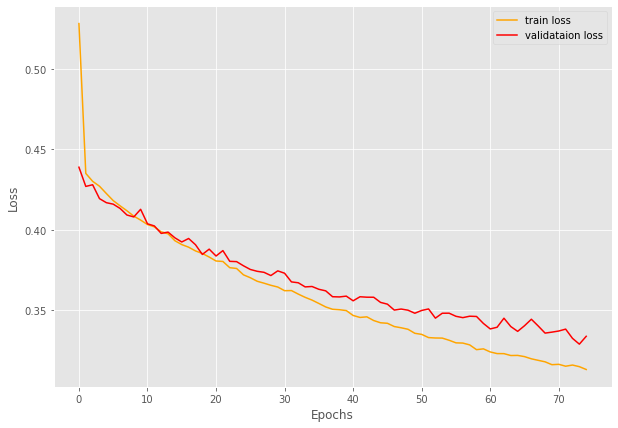

In [8]:
# save the trained model to disk
torch.save({
            'epoch': epochs,
            'model_state_dict': final_classifier.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, 'outputs/last_model_' + DATA_FOLDER_NAME + '.pth')
# plot and save the train and validation line graphs
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(valid_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('outputs/loss_' + DATA_FOLDER_NAME + '.png')
plt.show()

In [14]:
checkpoint = torch.load('outputs/best_model_' + DATA_FOLDER_NAME + '.pth')
# load model weights state_dict
final_classifier.load_state_dict(checkpoint['model_state_dict'])

# test dataset
test_data = ClevrPOCDataSet(DATA_FOLDER, 'testing', total_labels_to_index, ENVIRONMENT_FOLDER)
# test data loader
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)


test_accuracy = test(final_classifier, clip_model, test_loader, criterion, test_data, device, dropout, clip_preprocess)
print(test_accuracy)


Testing


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 49.36it/s]

0.340224182382226
tensor(26.5000, device='cuda:0')
